# Introduction
Well hello there! I'm super excited about the OpenAI to Z Kaggle Challenge- I've always been a big fan of applied AI, and am super curious about the findings and archeological progress that we will achieve in this challenge!

As a former ML engineer- I know next to nothing about archeology. As such, I'll be documenting my progress and sharing my learnings. I'll be starting with going through the [list of checkpoints that OpenAI has provided](https://cdn.openai.com/pdf/a9455c3b-c6e1-49cf-a5cc-c40ed07c0b9f/checkpoints-openai-to-z-challenge.pdf).

In [1]:
import base64
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from openai import OpenAI

# Checkpoint 0- Familiarise yourself with the content and data
1. Download one OpenTopography LiDAR tile or one Sentinel‑2 scene ID.
2. Run a single OpenAI o3/o4‑mini or GPT‑4.1 prompt on that data (e.g., “describe surface features in plain English”).
3. Print model version and dataset ID.

## Steps
1. I went to [OpenTopography's datasets page](https://portal.opentopography.org/datasets) with the initial aim of getting LiDAR data on Brazil- ideally regions like Acre where papers like Iriarte et al. (2020) focus on SW Amazonia (which includes Acre) and mound villages. Unfortunately, I could only find airborne LiDAR on Sao Paulo, and it was limited to academic access.
2. I then shifted my objective to simply loading a OpenTopography LiDAR tile to familiarise myself with what the data looks like. With that in mind, I landed on [Lidar Survey of the Centralia Mine, WA 2023](https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.112024.6339.1), dataset id: OT.112024.6339.1. I selected an area of roughly 2 square km that covered both slopes and water. I opted for raster data as I understand that raster data is smaller in size and easier to work with, albeit at the cost of some details.
3. I submitted the job and it took 10 seconds for the job to run on OpenTopography. The compressed raster file was 54MB for an area of 2 square km. Upon unzipping the file, there were 2 tif images.
4. To open the tif images and properly visualise them, I used [QGIS](https://qgis.org/), a free and open source spatial visualisation tool. This is what they look like in QGIS:

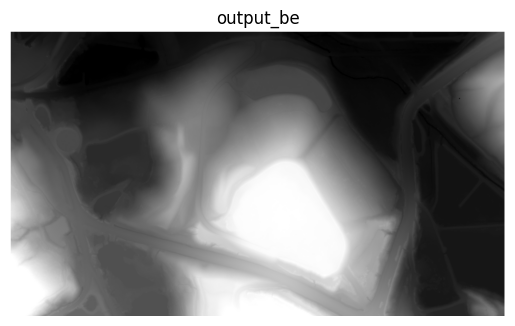

In [2]:
img = mpimg.imread('images/output_be.png')
plt.imshow(img)
plt.title("output_be")
plt.axis('off')  # Turn off axias numbers and ticks
plt.show()

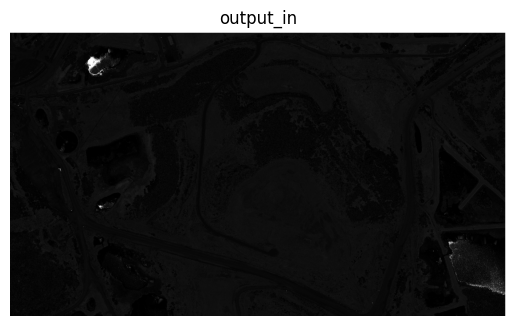

In [3]:
img = mpimg.imread('images/output_in.png')
plt.imshow(img)
plt.title("output_in")
plt.axis('off')  # Turn off axias numbers and ticks
plt.show()

I'll be honest! I was expecting more details. Being unsure of what to make of these two files, I decide to ask OpenAI's o4 mini model. Remember to set your OPENAI_API_KEY in your environment/secrets before running the cell below!

In [4]:
client = OpenAI()

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [5]:
output_be_base_64 = encode_image("images/output_be.png")
output_in_base_64 = encode_image("images/output_in.png")

In [6]:
completion = client.chat.completions.create(
    model="o4-mini",
    messages=[
        {
            "role": "user",
            "content": [
                { "type": "text", "text": "The following image is rasters (from a file called output-be) from Lidar Survey of the Centralia Mine, WA 2023. Please describe the features present in the image."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{output_be_base_64}",
                    },
                },
            ],
        }
    ],
)

print(completion.choices[0].message.content)

This image is a shaded‐relief (hillshade) rendering of the bare‐earth LiDAR DEM for the Centralia Mine area. Bright tones are the highest ground; dark tones the lowest. Even though it’s fairly abstract in grayscale, you can pick out the following mining-related landforms and infrastructure:

 1. Central High Pile (upper right of center)  
    - The very bright, roughly triangular area is a large overburden or waste-rock stockpile.  Its smooth slopes and uniform brightness indicate a conical or pyramidal spoil heap.

 2. Terraced Benches and Ramps  
    - Surrounding that main pile are a series of stepped terraces (bench faces) that show up as concentric bands of varying gray.  These are the lifts typical of earth-moving operations.  
    - Connecting those benches are gently winding lighter “stripes” (haul roads) that spiral up the mound.

 3. Access and Haul Roads (lower left to upper right)  
    - The almost straight, lighter gray band running from the bottom left toward the top rig

Wow, that was very informative! I'll copy the returned text below:

**o4-mini answer**

This image is a shaded‐relief (hillshade) rendering of the bare‐earth LiDAR DEM for the Centralia Mine area. Bright tones are the highest ground; dark tones the lowest. Even though it’s fairly abstract in grayscale, you can pick out the following mining-related landforms and infrastructure:

 1. Central High Pile (upper right of center)  
    - The very bright, roughly triangular area is a large overburden or waste-rock stockpile.  Its smooth slopes and uniform brightness indicate a conical or pyramidal spoil heap.

 2. Terraced Benches and Ramps  
    - Surrounding that main pile are a series of stepped terraces (bench faces) that show up as concentric bands of varying gray.  These are the lifts typical of earth-moving operations.  
    - Connecting those benches are gently winding lighter “stripes” (haul roads) that spiral up the mound.

 3. Access and Haul Roads (lower left to upper right)  
    - The almost straight, lighter gray band running from the bottom left toward the top right is a primary haul road or mine access drive.  
    - Secondary roads branch off it, still visible as thin light lines carved into the darker background.

 4. Low-lying Ponds or Depressions (upper left and right margins)  
    - In the northwest (upper left) there’s a circular dark depression—likely a water retention or settling pond.  
    - Smaller darker patches immediately around the spoil heap may be drainage channels or sumps where water has pooled.

 5. Natural Ground versus Disturbed Ground  
    - The darkest areas, especially along the extreme right and left margins, represent the original undisturbed ground at lower relief (valleys or vegetated areas).  
    - Transitional gray zones between the mine workings and the undisturbed hills are likely areas of regrading or slope reclamation.

Putting it all together, the scene shows a classic open-pit (or surface) mining complex: a big central waste-rock pile with drilled-out benches, a network of haul roads ascending and descending it, ancillary ponds for water management, and the surrounding natural terrain at a lower elevation.

Let's repeat the same step for the `output_in` file.

In [7]:
completion = client.chat.completions.create(
    model="o4-mini",
    messages=[
        {
            "role": "user",
            "content": [
                { "type": "text", "text": "The following image is rasters (from a file called output-in) from Lidar Survey of the Centralia Mine, WA 2023. Please describe the features present in the image."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{output_in_base_64}",
                    },
                },
            ],
        }
    ],
)

print(completion.choices[0].message.content)

The three of us on your Lidar‐derived raster (output-in) quickly agreed that this is not a natural back‐country landscape at all, but the footprint of an active mine and its supporting infrastructure.  Here is a point‐by‐point description of what jumps out:

1. Central Spoil/Stockpile  
   – In the very center of the scene sits a large, roughly triangular or teardrop-shaped mound.  
   – You can actually make out the single looping haul road (or ramp) spiraling up the side of it.  
   – Inside that loop, the surface texture is smoother/graded, indicating it’s a purpose-built stockpile or tailings dump rather than raw ground.

2. Haul Roads and Access Roads  
   – A wide, straight-ish road runs diagonally from the lower left toward the central spoil pile.  
   – Dozens of narrower, curving roads or berm rims skirt the edges of pits and ponds, interconnecting the various facilities.  
   – At the upper center and upper right you can trace portions of a perimeter haul road or even a publi

**o4-mini's answer**:

The three of us on your Lidar‐derived raster (output-in) quickly agreed that this is not a natural back‐country landscape at all, but the footprint of an active mine and its supporting infrastructure.  Here is a point‐by‐point description of what jumps out:

1. Central Spoil/Stockpile  
   – In the very center of the scene sits a large, roughly triangular or teardrop-shaped mound.  
   – You can actually make out the single looping haul road (or ramp) spiraling up the side of it.  
   – Inside that loop, the surface texture is smoother/graded, indicating it’s a purpose-built stockpile or tailings dump rather than raw ground.

2. Haul Roads and Access Roads  
   – A wide, straight-ish road runs diagonally from the lower left toward the central spoil pile.  
   – Dozens of narrower, curving roads or berm rims skirt the edges of pits and ponds, interconnecting the various facilities.  
   – At the upper center and upper right you can trace portions of a perimeter haul road or even a public highway that skirts the mine property.

3. Water / Sedimentation Ponds  
   – At least four distinct water bodies or settling ponds appear as bright, highly reflective patches:  
     • A roughly circular pond (or clarifier tank) just west of the spoil pile.  
     • Two adjacent circular clarifier tanks at upper left.  
     • A large rectangular–shaped pond on the far right.  
     • A small pond or sump cut into the lower-left haul road.  
   – The very bright (white) spots are almost certainly specular reflections off standing water.

4. Processing Pads / Laydown Areas  
   – Near the circular clarifiers on the upper left you can see a bright, irregular patch—likely a concrete pad or crusher/processing area where heavy equipment works.  
   – Other smaller bright “blotches” scattered around the margins could be stockpiles of aggregate or exposed conveyor belts.

5. Vegetation and Undisturbed Ground  
   – Outside the mine’s working footprint, most of the darker, speckled areas are undisturbed ground or low vegetation.  
   – You can see the tree lines and brush particularly on the eastern slopes and outside the haul roads.

6. Overall Mine Footprint  
   – The entire working area is bounded by haul roads tracing an irregular polygon perhaps 1 – 1.5 km across.  
   – The shape and pattern of benches, roads, and ponds are textbook for an open-pit coal operation (which is what Centralia Mine is).

In short, your image shows:
– A central tailings or stockpile cone with a spiral haul road.  
– Multiple sedimentation/clarifier ponds (both circular and rectangular).  
– A network of haul roads tying everything together.  
– A few processing pads or laydown areas with high-reflectance surfaces.  
– Surrounding undisturbed ground and brush beyond the mine perimeter.

Ok, I'm not sure about you- but frankly I still feel quite lost! Due to the lack of domain expertise, I cannot verify if the comments returned by o4 mini are accurate. With that in mind, it's time to:
1. Build up our domain knowledge
2. Move on to Checkpoint 1

To speed up our learning process, we will be doing these two tasks in an alternating manner- build up our knowledge just enough to clear part of Checkpoint 1, then do the part of Checkpoint 1... so on and forth.

# Checkpoint 1- An Early Explorer (from OpenAI)

Show us you can mine and gather insights from multiple data types. Submit code that:
1. Loads two independent public sources (e.g., GEDI + TerraBrasilis polygons)
2. Produces at least five candidate “anomaly” footprints (bbox WKT or lat/lon center + radius)
3. Logs all dataset IDs and OpenAI prompts. Verify: Automated script re‑runs → same five
footprints ±50 m.
4. Show us how you can use this new data in future discovery - re-prompt the model with this
leverage.

## ELI5 Checkpoint 1 Instructions
I don't know about you- but that was quite a challenge for me to understand! Thankfully, we live in the era of language models where we can prompt them to explain information. Here's the ELI5 that a language model returned:

Imagine you're a detective looking for hidden treasure (ancient sites!).

1. Use Two Different Treasure Maps (Load two independent public sources):
  - You can't just use one map because it might be old or not show everything. So, you get two different kinds of maps.
  - One map might be a bumpy map showing hills and valleys, even under trees (like GEDI LiDAR which tells you ground height).
  - Another map might show areas where people have already marked "interesting spots" or "areas where trees were cut down a long time ago" (like TerraBrasilis polygons which might show deforestation areas, or areas of known archaeological interest).
  - Your computer needs to be able to read both these "maps."

2. Find Five "Hmm, That's Weird!" Spots (Produces at least five candidate “anomaly” footprints):
  - You look at your two maps together. You're searching for places where something looks a bit strange or different – an "anomaly."
  - Maybe on your bumpy map (GEDI), you see a perfectly round hill in a flat area where your other map (TerraBrasilis) shows old deforestation. That's a "Hmm, that's weird!" spot.
  - You need to find at least five of these spots.
  - Then, you draw a little circle or square around each spot on your big map and write down its location (its address, like latitude/longitude, or a shape).
3. Write Down Your Detective Notes (Logs all dataset IDs and OpenAI prompts. Verify...):
  - Every time you use a map, you write down which map it was (its "ID number").
  - If you ask your super-smart helper (OpenAI model) any questions to help you find these spots, you write down exactly what you asked it.
  - Super Important: If another detective (or your computer again) follows your exact same steps and uses your exact same notes, they should find the exact same five weird spots (or very, very close, like within a few big steps). This means your detective work is repeatable!
4. Tell Your Smart Helper What You Found (Show us how you can use this new data in future discovery - re-prompt the model with this leverage):
  - Now that you've found some "weird spots," you go back to your super-smart helper (OpenAI model).
  - You say, "Hey, look! I found these five interesting spots using these two maps. See how they have [describe the weirdness, e.g., 'a round shape on the bumpy map inside an old cleared area']? Can you help me think about what else these clues might mean, or where else we should look for similar treasure?"
  - You're showing that finding these first few clues helps you ask even smarter questions next time.

## Technical instructions on Checkpoint 1
Well, the ELI5 really cleared up a few things for me! So Checkpoint 1 is where we really start digging into the data and try to find previously unknown archeological sites. Here's a more technical strategy provided by a language model:

**1. Load two independent public sources (e.g., GEDI + TerraBrasilis polygons OR alternatives from the guide):**

*   **Primary Suggestion (as before, but with GEE emphasis):**
    *   **Source 1: GEDI (via Google Earth Engine - GEE):**
        *   **Why:** GEE is explicitly mentioned for GEDI access. This simplifies data acquisition and initial filtering (e.g., by region, by quality flags).
        *   **How:** Use the GEE Python API. Search for the GEDI L2A or L2B product. Filter for your chosen area in Brazil. Extract relevant bands like `elev_lowestmode` (ground elevation), `sensitivity` (a quality indicator), and coordinates.
        *   **Dataset ID:** The GEE asset ID (e.g., `LARSE/GEDI/GEDI02_B/v002`).
    *   **Source 2: TerraBrasilis Polygons (e.g., PRODES Deforestation):**
        *   **Why:** Provides crucial landscape context (cleared areas where ground features might be visible or less obscured).
        *   **How:** Download shapefiles/GeoJSON from the TerraBrasilis portal. Load with `geopandas`.
        *   **Dataset ID:** Specific dataset name and year (e.g., "PRODES Desmatamento 2022 - Amazônia Legal") and download URL.

*   **Alternative/Additional Source Ideas (from the guide, for future checkpoints or if GEDI/TerraBrasilis proves difficult initially):**
    *   **Sentinel-2 (via GEE):** For identifying "vegetation scars" or soil color changes. You could combine this with GEDI. For example, look for GEDI ground elevation anomalies *within* areas that show vegetation stress or unusual soil patterns in Sentinel-2 imagery.
        *   **Dataset ID:** GEE asset ID (e.g., `COPERNICUS/S2_SR_HARMONIZED`).
    *   **SRTM (via GEE):** A coarser DEM. You could look for GEDI points that show a significant local deviation from the broader SRTM topography.
        *   **Dataset ID:** GEE asset ID (e.g., `USGS/SRTMGL1_003`).
    *   **The Archeo Blog (Archaeological Point Data):** While not directly for finding *new* anomalies for this checkpoint, you could use these known points to *calibrate* your anomaly detection. For instance, see if your GEDI + TerraBrasilis criteria would flag areas near known sites. This aligns with "Archaeologists go from the known to the unknown."
        *   **Dataset ID:** URL of the blog post/data source.

**2. Produces at least five candidate “anomaly” footprints (bbox WKT or lat/lon center + radius):**

*   **Refined Anomaly Definition - Leveraging the Guide's "Tips & Tricks":**
    *   **"Look at where things are appearing and search for patterns: Archaeological sites tend to appear in similar places (along waterways, in higher elevations, along trade routes)."**
        *   **Strategy:**
            1.  Spatially join GEDI points with TerraBrasilis deforestation polygons.
            2.  Further filter these GEDI points by proximity to rivers (get river data from GEE or other open sources like HydroSHEDS).
            3.  Within these filtered GEDI points (deforested areas near rivers), look for:
                *   **Local Highs:** Clusters of GEDI ground points significantly higher than their immediate surroundings (potential mounds).
                *   **Geometric Patterns (Conceptual for GEDI):** While GEDI's sparse points make detecting perfect geometry hard, look for linear arrangements of slightly elevated/depressed points, or roughly circular/rectangular clusters of anomalous points.
                *   **Canopy Dips (as per sample submission):** Look for GEDI points where `elev_lowestmode` (ground) is relatively high, but the difference between canopy top (`elev_highestreturn`) and ground is unusually small *within a forested patch* near a deforested area (could indicate an overgrown structure). This is more advanced but aligns with the sample.

*   **Using OpenAI for Anomaly Idea Generation (as per guide's prompts):**
    *   **Prompt Idea (before coding anomaly detection):**
        ```python
        prompt_anomaly_def = """
        I am analyzing GEDI L2B ground elevation data (points with lat, lon, elev_lowestmode) and TerraBrasilis PRODES deforestation polygons for the [Your Chosen Region, e.g., Acre, Brazil] region of the Amazon.
        My goal is to identify at least 5 candidate 'anomaly' footprints that might suggest pre-Columbian earthworks.
        Considering that archaeological sites often appear along waterways or on slightly higher ground, and that deforestation might reveal these features:
        1. What specific numerical criteria or spatial relationships between GEDI ground elevation points and their neighbors, within deforested polygons and near rivers, could define an 'anomaly'?
        2. How could I define a 'footprint' (e.g., bounding box or center + radius) around such anomalous GEDI points?
        Please suggest 2-3 distinct anomaly types I could search for.
        """
        # Log this prompt_anomaly_def
        # response = call_openai_api(prompt_anomaly_def)
        # Use response to refine your programmatic detection logic
        ```

*   **Programmatic Implementation:**
    *   Use `geopandas` for spatial operations (intersections, buffering around rivers).
    *   Use `scipy.spatial.KDTree` or `sklearn.neighbors.NearestNeighbors` to find neighboring GEDI points efficiently.
    *   Calculate local statistics (mean elevation of neighbors, difference from mean).
    *   Cluster nearby anomalous points (e.g., using `DBSCAN` if you have enough points, or a simpler proximity rule).
    *   For each cluster, calculate the WKT bbox or center + radius.

**3. Logs all dataset IDs and OpenAI prompts. Verify reproducibility:**

*   **Dataset IDs:** Explicitly list GEE asset IDs, TerraBrasilis download URLs/dataset names, etc., in your code or a separate log.
*   **OpenAI Prompts:** Store every prompt sent to the OpenAI API in a string variable and log/print it.
*   **Reproducibility:**
    *   Set `random.seed()` if any stochastic processes are used.
    *   Ensure your GEE queries (date ranges, regions) are fixed.
    *   The ±50m tolerance is key. Your script, when re-run, should produce anomaly centers that are within 50m of the previous run's centers. This primarily accounts for any slight variations in how GEDI points might be queried or floating-point calculations.

**4. Show us how you can use this new data in future discovery - re-prompt the model with this leverage:**

*   **Describe Your Anomalies Concisely:** For each of your five anomalies, create a short description similar to the "Sample Submission Rationale":
    *   *Example Anomaly 1:* "Lat: -10.123, Lon: -68.456. GEDI ground elevation shows a 1.5m rise over 30m diameter within a 2015 PRODES deforestation polygon, 200m from the Xapuri River."
*   **Construct the Re-prompt (using guide's prompt style as inspiration):**
    ```python
    anomaly_descriptions = [
        "Anomaly 1: Lat: -10.123, Lon: -68.456. GEDI ground elevation shows a 1.5m rise over 30m diameter within a 2015 PRODES deforestation polygon, 200m from the Xapuri River.",
        # ... descriptions for other 4 anomalies
    ]
    detailed_anomaly_string = "\n".join(anomaly_descriptions)

    re_prompt_future_discovery = f"""
    I have identified the following 5 candidate archaeological anomalies in [Your Chosen Region, e.g., Acre, Brazil] using GEDI ground elevation data and TerraBrasilis deforestation polygons:
    {detailed_anomaly_string}

    For future discovery, leveraging these initial findings:
    1. What complementary remote sensing data (e.g., specific Sentinel-1/2 bands or indices, SRTM derivatives, available high-resolution OpenTopography LiDAR if any exists nearby) should I investigate for these 5 locations to gather further evidence or refine their interpretation?
    2. Based on the characteristics of these 5 anomalies, suggest 2 new search strategies or refined criteria for finding similar anomalies in adjacent, unsearched areas using the same GEDI and TerraBrasilis datasets.
    3. If I were to use Sentinel-2 imagery (available on GEE) to examine these 5 locations, what specific visual patterns (e.g., vegetation stress signatures, soil marks) should I look for that might corroborate an anthropogenic origin, and what GEE methods could I use to highlight them?
    """
    # Log this re_prompt_future_discovery
    # print("--- OpenAI Re-Prompt for Future Discovery ---")
    # print(re_prompt_future_discovery)
    # (For the actual submission, you might describe what kind of response you'd expect or how you'd use it)
    ```

### Brushing up uncertainties in archeology
Despite reading through the instructions, I'm still quite unsure about what I know/not know. I plan to read 1-3 suggested readings and incorporate what I learn into the process!